# Idea: 
Citibike riders in Brooklyn are younger than riders in Manhattan


# Hypotheses:
- **Null hypothesis**: The distribution of ages of subscribers who start rides in Brooklyn stations is the same as subscribers who start rides in Manhattan stations
- **Alternative hypothesis**: The distribution of ages of subscribers who start rides in Brooklyn stations is different than subscribers who start rides in Manhattan stations

We define our confidence level alpha = 0.05


In [20]:
import pylab as pl
import pandas as pd
import numpy as np

import scipy.stats

import requests

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [21]:
s = requests.get("https://raw.githubusercontent.com/Casyfill/CUSP_templates/master/Py/fbMatplotlibrc.json").json()
pl.rcParams.update(s)

## Reading Data

In [22]:
# Reading in the Citi Bike trip data from Oct 2014
trips = pd.read_csv('https://raw.githubusercontent.com/Casyfill/PUI_Bycicle_Research/master/data/r_trips.csv',index_col=0 )

trips.head(4)

,sid,usertype,birth year,gender,age
0,479,Subscriber,1977,1,38
1,417,Subscriber,1974,2,41
2,327,Subscriber,1990,1,25
3,515,Subscriber,1966,1,49


In [23]:
# Reading in the csv of stations that have been joined with their borough (MH and BK only)
stations = pd.read_csv('https://raw.githubusercontent.com/Casyfill/PUI_Bycicle_Research/master/data/stations.csv', index_col=0 )
stations.head(5)

,Y,sid,lat,lon,boro
X,,,,,
-73.976323,40.683826,83,40.683826,-73.976323,BK
-73.978034,40.696089,119,40.696089,-73.978034,BK
-73.959282,40.686768,120,40.686768,-73.959282,BK
-73.993379,40.692395,143,40.692395,-73.993379,BK
-73.980689,40.698399,144,40.698399,-73.980689,BK


In [24]:
# Subsetting the trips data to only look at Subscribers and people with reasonable birth years
trips = trips[(trips['usertype']=='Subscriber')&(trips['birth year']>1925)]

In [25]:
trips = trips.merge(stations[['sid','boro']], how='inner', on='sid')

In [26]:
# Calculating the median age of riders from trips beginning at each sid
MH = trips[trips['boro']== 'MH']
BK = trips[trips['boro']== 'BK']
bins = np.arange(0, 100, 5)

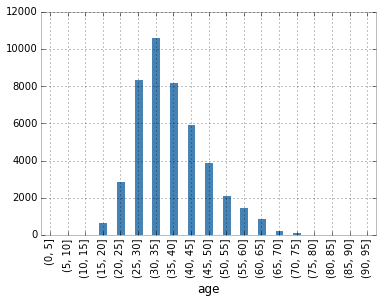

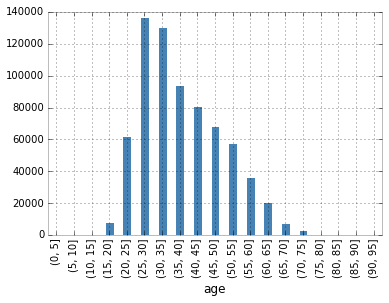

In [27]:
# MH['age'].hist(alpha=0.6);
# BK['age'].hist(alpha=0.6);
BK.age.groupby(pd.cut(BK.age, bins)).agg([count_nonzero]).plot(kind='bar', legend=0);
MH.age.groupby(pd.cut(MH.age, bins)).agg([count_nonzero]).plot(kind='bar', legend=0);

In [28]:
# Creating cummulative distributions for BK and MH
cMH = MH.age.groupby(pd.cut(MH.age, bins)).agg([count_nonzero]).cumsum()
cBK = BK.age.groupby(pd.cut(BK.age, bins)).agg([count_nonzero]).cumsum()


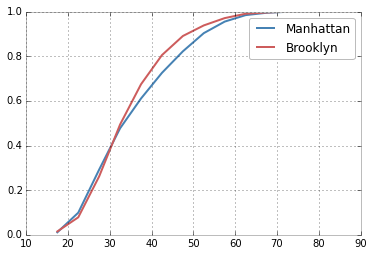

In [29]:
pl.plot(bins[:-1] + 2.5, cMH / cMH.max(), label = "Manhattan");
pl.plot(bins[:-1] + 2.5, cBK / cBK.max(), label = "Brooklyn");
pl.legend()


# Runnning a T-test and K-S test to compare the samples

In [30]:

ks = scipy.stats.ks_2samp(MH.age, BK.age)
print 'K-S Statistic:', round(ks[0],6)
print 'p value:', round(ks[1],6)

K-S Statistic: 0.081676
p value: 0.0


## Conclusion:
The p-value of 0.03877 is less than our signficance level alpha = 0.05, therefore we reject the null hypothesis that the distribution of ages for Manhattan and Brooklyn riders look the same.



# Let's do a T-test now!

Null hypothesis:
The average age of subscribers who start rides in Brooklyn stations is greater or the same as subscribers who start rides in Manhattan stations

Alternative hypothesis:
The average of subscribers who start rides in Brooklyn stations is lower than that of subscribers who start rides in Manhattan stations

Assumptions: we assume that the two samples are independently randomly selected samples and that October 2014, which is our chosen month of data, is a representative month. We also assume the age distribution is more or less normal for both populations.

alpha = 0.05

In [31]:
boro_merge = trips.groupby(['boro'], as_index=False).agg(['mean','count'])

In [32]:
#let's take a quick look at the count and average age
print boro_merge['age']

           mean   count
boro                   
BK    37.403444   45766
MH    38.629209  707170


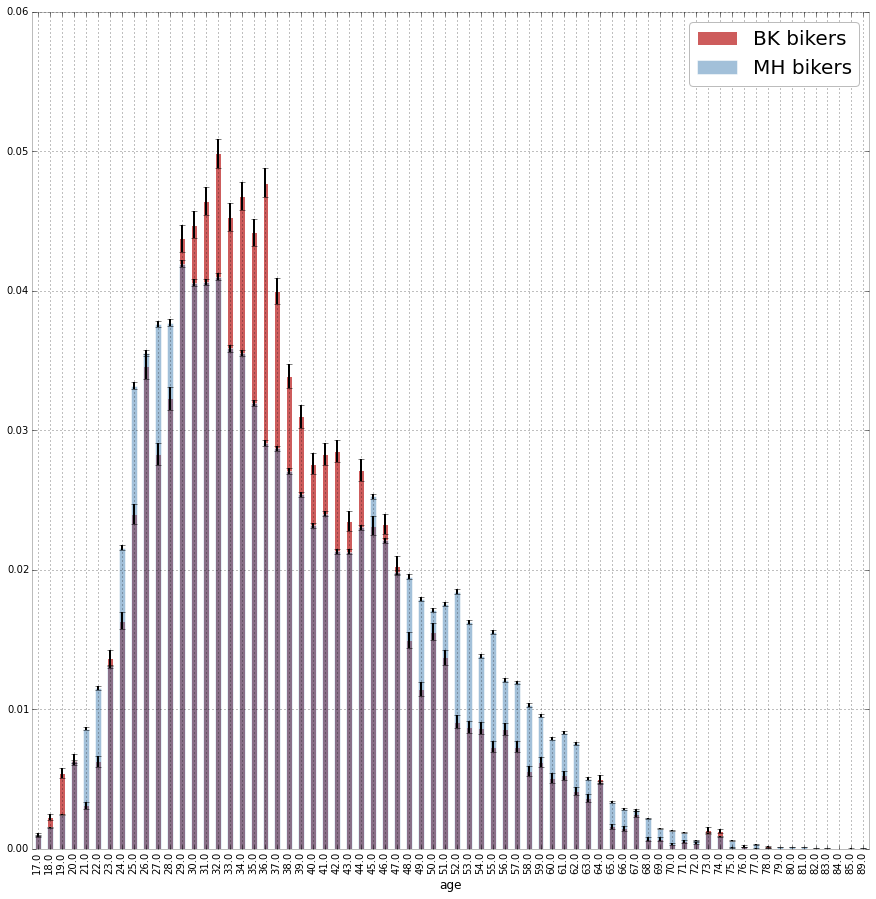

In [33]:
#let's visualize this data.
mergedtrips = trips
fig=pl.figure(figsize(15,15))

counts_BK= mergedtrips.boro[mergedtrips.boro=='BK'].groupby([mergedtrips.age]).count()
counts_MH= mergedtrips.boro[mergedtrips.boro=='MH'].groupby([mergedtrips.age]).count()

norm_BK = counts_BK.sum()
error_BK=np.sqrt(counts_BK)
ax = ((counts_BK)/norm_BK).plot(kind="bar",color='IndianRed',  yerr=[((error_BK)/norm_BK,(error_BK)/norm_BK)], label='BK bikers')


norm_MH = counts_MH.sum()
error_MH=np.sqrt(counts_MH)
ax = ((counts_MH)/norm_MH).plot(kind="bar", alpha=0.5, yerr=[((error_MH)/norm_MH,(error_MH)/norm_MH)], label='MH bikers')

pl.legend(['BK bikers','MH bikers'],fontsize=20)

In [34]:
df_BK = mergedtrips[mergedtrips['boro'] == 'BK']['age']
df_MH = mergedtrips[mergedtrips['boro'] == 'MH']['age']

In [35]:
#finally, run a T-Test on these two sample data sets
result = scipy.stats.ttest_ind(df_BK,df_MH)
print result

Ttest_indResult(statistic=-22.323218963052874, pvalue=2.3884394725417008e-110)


In [36]:
if result[1]<.05:
    print 'Yeah! We can reject Null hypotesis now!'

Yeah! We can reject Null hypotesis now!


## Conclusion

our t-statistic yields a very small p-value (2.38E-110) which is much less than our chosen alpha of 0.05. Therefore, we reject the null hypothesis. Brooklyn riders are on average younger than Manhattan riders!